In [5]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics


numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)
print(np.shape(imagenes), n_imagenes)


data = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
print(np.shape(data))


scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.5)


x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

(1797, 8, 8) 1797
(1797, 64)


In [6]:
numero = 1
dd = y_train==numero
cov = np.cov(x_train[dd].T)
valores, vectores = np.linalg.eig(cov)
valores = np.real(valores)
vectores = np.real(vectores)
ii = np.argsort(-valores)
valores = valores[ii]
vectores = vectores[:,ii]



verdaderos_train = 1.0*(y_train==1)
verdaderos_test = 1.0*(y_test==1)

proyeccion_train = np.matmul(x_train,vectores)
proyeccion_test = np.matmul(x_test,vectores)
discriminante = LinearDiscriminantAnalysis()

In [7]:
def darF1(numComponentes):    
    discriminante.fit(proyeccion_train[:,:numComponentes],1.0*(y_train==1))
    
    probabilidades = discriminante.predict_proba(proyeccion_test[:,:numComponentes])
    precision, recall, th = metrics.precision_recall_curve(verdaderos_test,probabilidades[:,1])
    f1 = 2*(precision*recall)/(precision+recall)
    scoreTest = np.amax(f1)
    
        
    probabilidades = discriminante.predict_proba(proyeccion_train[:,:numComponentes])
    precision, recall, th = metrics.precision_recall_curve(verdaderos_train,probabilidades[:,1])
    f1 = 2*(precision*recall)/(precision+recall)
    scoreTrain = np.amax(f1)
    
    return scoreTrain,scoreTest

def darF1_otros(numComponentes):    
    discriminante.fit(proyeccion_train[:,:numComponentes],1.0*(y_train!=1))
    
    probabilidades = discriminante.predict_proba(proyeccion_test[:,:numComponentes])
    precision, recall, th = metrics.precision_recall_curve(1-verdaderos_test,probabilidades[:,1])
    f1 = 2*(precision*recall)/(precision+recall)
    scoreTest = np.amax(f1)
    
        
    probabilidades = discriminante.predict_proba(proyeccion_train[:,:numComponentes])
    precision, recall, th = metrics.precision_recall_curve(1-verdaderos_train,probabilidades[:,1])
    f1 = 2*(precision*recall)/(precision+recall)
    scoreTrain = np.amax(f1)
    
    return scoreTrain,scoreTest

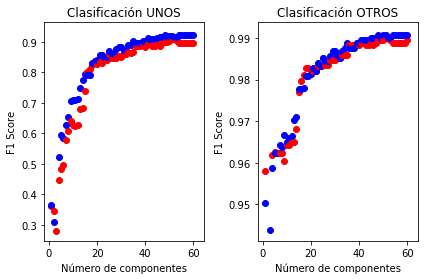

In [5]:
import warnings
warnings.filterwarnings('ignore')

f1_unos_train = []
f1_otros_train = []

f1_unos_test = []
f1_otros_test = []

componentes = range(1,61)

fig,ax = plt.subplots(1,2)
for i in componentes:
    f1_train,f1_test = darF1(i)
    f1_unos_train.append(f1_train)
    f1_unos_test.append(f1_test)
    
    f1_train,f1_test = darF1_otros(i)
    f1_otros_train.append(f1_train)
    f1_otros_test.append(f1_test)
    
    
ax[0].scatter(componentes,f1_unos_train,c='r')
ax[0].scatter(componentes,f1_unos_test,c='b')  
ax[0].set_xlabel('Número de componentes')
ax[0].set_ylabel('F1 Score')
ax[0].set_title('Clasificación UNOS')
    
ax[1].scatter(componentes,f1_otros_train,c='r')
ax[1].scatter(componentes,f1_otros_test,c='b')
ax[1].set_xlabel('Número de componentes')
ax[1].set_ylabel('F1 Score')
ax[1].set_title('Clasificación OTROS')

    
fig.tight_layout()
fig.savefig('grafica_F1.png')

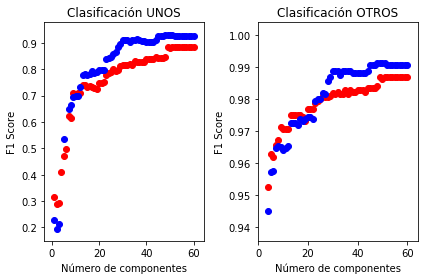